In [11]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")
from collections import Counter
pd.set_option("display.max_columns" , 50)

In [3]:
df = pd.read_csv("D:\Capstone Project\Training_Dataset_v2.csv")
df

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1687856,1373987,-1.0,NaN,0.0,5.0,7.0,9.0,1.0,3.0,3.0,8.0,0.0,No,0.0,-99.00,-99.00,1.0,No,No,No,Yes,No,No
1687857,1524346,-1.0,9.0,0.0,7.0,9.0,11.0,0.0,8.0,11.0,12.0,0.0,No,0.0,0.86,0.84,1.0,Yes,No,No,No,No,Yes
1687858,1439563,62.0,9.0,16.0,39.0,87.0,126.0,35.0,63.0,153.0,205.0,12.0,No,0.0,0.86,0.84,6.0,No,No,No,Yes,No,No
1687859,1502009,19.0,4.0,0.0,0.0,0.0,0.0,2.0,7.0,12.0,20.0,1.0,No,0.0,0.73,0.78,1.0,No,No,No,Yes,No,No


In [4]:
#making it Nan first and then replacing to avoid misinterpretation

df['perf_6_month_avg'].replace(-99,np.NaN, inplace=True)
df['perf_12_month_avg'].replace(-99,np.NaN,inplace=True)

In [5]:
df["lead_time"] = df["lead_time"].fillna(df["lead_time"].median())
df["perf_6_month_avg"] = df["perf_6_month_avg"].fillna(df["perf_6_month_avg"].median())
df["perf_12_month_avg"] = df["perf_12_month_avg"].fillna(df["perf_12_month_avg"].median())

In [6]:
## This last row considered to be invalid and can be removed 

df = df.dropna()

In [7]:
df["potential_issue"] = df["potential_issue"].replace({"Yes" : 1 , "No" : 0}).astype(int)
df["deck_risk"] = df["deck_risk"].replace({"Yes" : 1 , "No" : 0}).astype(int)
df["oe_constraint"] = df["oe_constraint"].replace({"Yes" : 1 , "No" : 0}).astype(int)
df["ppap_risk"] = df["ppap_risk"].replace({"Yes" : 1 , "No" : 0}).astype(int)
df["stop_auto_buy"] = df["stop_auto_buy"].replace({"Yes" : 1 , "No" : 0}).astype(int)
df["rev_stop"] = df["rev_stop"].replace({"Yes" : 1 , "No" : 0}).astype(int)
df["went_on_backorder"] = df["went_on_backorder"].replace({"Yes" : 1 , "No" : 0}).astype(int)

In [8]:
df['went_on_backorder'].value_counts()

0    1676567
1      11293
Name: went_on_backorder, dtype: int64

Text(0, 0.5, 'Frequency')

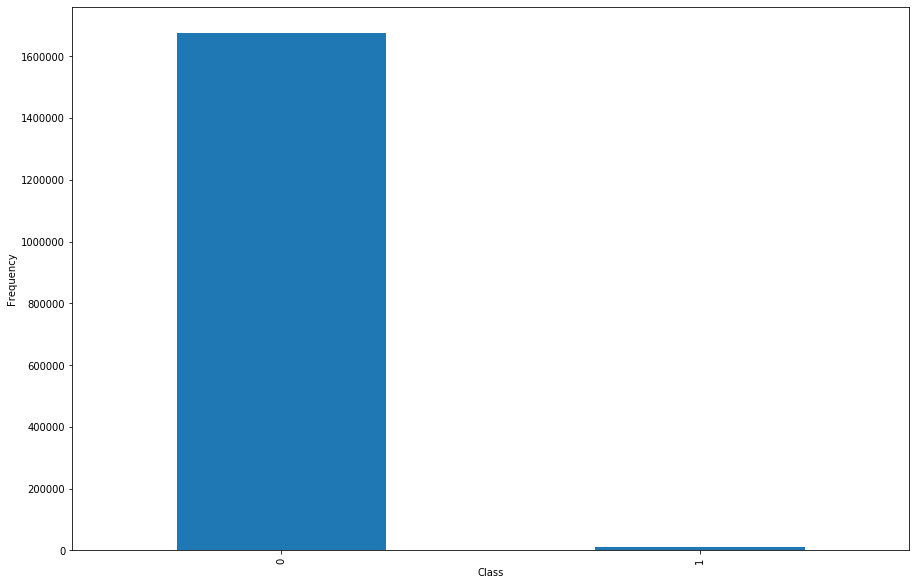

In [9]:
plt.figure(figsize=(15,10))
df['went_on_backorder'].value_counts().plot(kind = "bar")
plt.xlabel("Class")
plt.ylabel("Frequency")

## Scale the data 

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
X = df.drop(["went_on_backorder" , "sku"] ,1 )
y = df["went_on_backorder"]

In [14]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)


In [15]:
X

array([[2.20488187e-03, 1.53846154e-01, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [2.20504366e-03, 1.73076923e-01, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [2.20504366e-03, 1.53846154e-01, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       ...,
       [2.20480097e-03, 1.73076923e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.20989738e-03, 1.73076923e-01, 3.26925592e-05, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [2.20641888e-03, 7.69230769e-02, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

In [16]:
y

0          0
1          0
2          0
3          0
4          0
          ..
1687855    0
1687856    0
1687857    1
1687858    0
1687859    0
Name: went_on_backorder, Length: 1687860, dtype: int32

In [17]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state = 62)

I will attempt to perform 3 methods of sampling to resolve this imbalanced dataset issue

##### Undersampling

##### Oversampling

##### SMOTE - Synthetic Minority Oversampling Technique


## 1. Undersampling

The process of reducing the class instances of the MAJORITY class is called Undersampling. I will attempt to undersample the data and give a 50/50 ratio to each of the class's instances. Following are the steps for undersampling

    * Find the number of the minority class

    * Find the indices of the majority class

    * Find the indices of the minority class

    * Randomly sample the majority indices with respect to the minority numbers

    * Concat the minority indices with the indices from step 4

    * Get the balanced dataframe - This is the final undersampled data

Disadvantage is you will lose critical data as you are reducing the instances of the majority class.



## 1 - Backorder 
## 0 - Not Backorder 

In [21]:
#1. Find the number of the minority class

number_bo = len(df[df['went_on_backorder']==1])

In [22]:
number_not_bo = len(df[df['went_on_backorder']==0])

In [23]:
print(number_bo)
print(number_not_bo)

11293
1676567


In [24]:
#2. Find the indices of the majority class
index_not_bo= df[df['went_on_backorder']==0].index

In [25]:
#.3 Find the indices of the minority class
index_bo = df[df['went_on_backorder']==1].index

In [26]:
#4. Randomly sample the majority indices with respect to the number of minority classes
random_indices = np.random.choice(index_not_bo, number_bo,replace='False')

In [27]:
len(random_indices)

11293

In [28]:
#5. Concat the minority indices with the indices from step 4
under_sample_indices = np.concatenate([index_bo,random_indices])

In [29]:
#Get the balanced dataframe - This is the final undersampled data
under_sample_df = df.iloc[under_sample_indices]

In [30]:
under_sample_df

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
143,1111623,0.0,8.0,0.0,2.0,3.0,5.0,0.0,3.0,3.0,3.0,2.0,0,0.0,0.68,0.58,0.0,0,0,1,1,0,1
173,1111652,24.0,8.0,0.0,3456.0,3456.0,3456.0,10.0,39.0,68.0,93.0,7.0,0,0.0,1.00,0.95,1.0,0,0,1,1,0,1
176,1111655,-55.0,8.0,2.0,428.0,526.0,606.0,25.0,100.0,205.0,387.0,52.0,0,0.0,0.85,0.83,56.0,0,0,0,1,0,1
180,1111659,30.0,8.0,14.0,42.0,84.0,126.0,7.0,56.0,107.0,148.0,24.0,0,0.0,0.98,0.92,0.0,0,0,0,1,0,1
191,1111670,-499.0,12.0,350.0,3452.0,5044.0,7188.0,747.0,2550.0,3572.0,4745.0,401.0,0,0.0,0.49,0.72,525.0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968829,3056674,23.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.85,0.83,0.0,0,0,0,1,0,0
714658,2062627,97.0,2.0,0.0,0.0,0.0,8.0,4.0,24.0,65.0,118.0,0.0,0,0.0,0.85,0.51,0.0,0,0,0,1,0,0
148227,1259739,5.0,12.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,2.0,0.0,0,0.0,0.47,0.39,0.0,1,0,0,1,0,0
1370845,2957657,145.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0,0.0,1.00,0.98,0.0,0,0,0,1,0,0


In [32]:
Counter(under_sample_df["went_on_backorder"])

Counter({1: 11293, 0: 11293})

In [36]:
under_sample_backorder_counts = pd.value_counts(under_sample_df['went_on_backorder'])

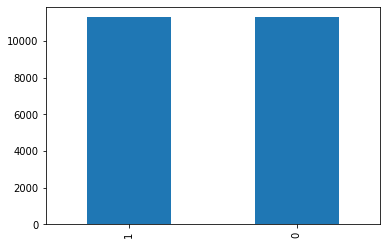

In [38]:
under_sample_backorder_counts.plot(kind = "bar")

In [39]:
## now that our data is equally distributed, we can split the data to X,y, train and test

In [41]:
X_under = under_sample_df.drop(["sku" , "went_on_backorder"] , 1)
y_under = under_sample_df["went_on_backorder"]

In [42]:
x_under_train, x_under_test, y_under_train, y_under_test = train_test_split(X_under, y_under, test_size=0.30, random_state=100)

## Random Forest 

In [43]:
from sklearn.metrics import accuracy_score, f1_score,confusion_matrix,classification_report,roc_auc_score,roc_curve,auc
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

In [44]:
# Let's run the model

rf = RandomForestClassifier()
rf.fit(x_under_train, y_under_train)

RandomForestClassifier()

#### Random Forest Prediction

In [46]:
# Predicted probabilities
y_pred = rf.predict_proba(x_under_test)

In [47]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)

In [48]:
# Converting to column dataframe (keeping the outcome of 1)
y_pred_1 = y_pred_df.iloc[:,[1]]

In [49]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_under_test)

In [50]:
# Putting sku to index
y_test_df['sku'] = y_test_df.index

In [51]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [52]:
# Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)

In [53]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'went_backorder_Prob'})

In [54]:
cols = y_pred_final.columns.tolist()
cols

['went_on_backorder', 'sku', 'went_backorder_Prob']

In [55]:
cols.insert(1, cols.pop(cols.index('went_on_backorder')))  ## 0 is the destination index , Mid is ur feature
cols

['sku', 'went_on_backorder', 'went_backorder_Prob']

In [56]:
y_pred_final = y_pred_final.reindex(columns= cols)
y_pred_final.head()
## Column reindex is performed 

,sku,went_on_backorder,went_backorder_Prob
0,862938,1,0.990000
1,167842,0,0.262769
2,1165669,0,0.100000
3,1169516,1,0.890000
4,228081,1,0.965000


In [57]:
# Creating new column 'predicted' with 1 if went_on_backorder >0.5 else 0
y_pred_final['predicted'] = y_pred_final.went_backorder_Prob.map( lambda x: 1 if x > 0.5 else 0)

In [58]:
y_pred_final

,sku,went_on_backorder,went_backorder_Prob,predicted
0,862938,1,0.990000,1
1,167842,0,0.262769,0
2,1165669,0,0.100000,0
3,1169516,1,0.890000,1
4,228081,1,0.965000,1
...,...,...,...,...
6771,924516,1,0.910000,1
6772,1054377,0,0.000000,0
6773,1360896,0,0.180000,0
6774,605558,0,0.030000,0


In [60]:
from sklearn import metrics 

In [61]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.went_on_backorder, y_pred_final.predicted )
confusion

array([[2998,  372],
       [ 221, 3185]], dtype=int64)

In [62]:
Accuracy = metrics.accuracy_score(y_pred_final.went_on_backorder, y_pred_final.predicted)
print(Accuracy)

0.9124852420306966


In [63]:
Classification = metrics.classification_report(y_pred_final.went_on_backorder, y_pred_final.predicted)
print(Classification)

              precision    recall  f1-score   support

           0       0.93      0.89      0.91      3370
           1       0.90      0.94      0.91      3406

    accuracy                           0.91      6776
   macro avg       0.91      0.91      0.91      6776
weighted avg       0.91      0.91      0.91      6776



### ROC Plot

In [64]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

In [65]:
def roc_auc(actual , probs):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    return auc_score

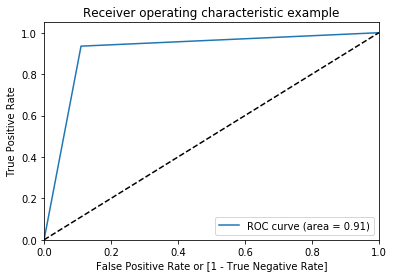

(array([0.        , 0.11038576, 1.        ]),
 array([0.       , 0.9351145, 1.       ]),
 array([2, 1, 0], dtype=int64))

In [66]:
draw_roc(y_pred_final.went_on_backorder, y_pred_final.predicted)

In [69]:
from sklearn.metrics import recall_score , precision_score , f1_score

In [76]:
print("The AUC score is :" , roc_auc(y_pred_final.went_on_backorder, y_pred_final.predicted) * 100)
print("The Recall score is : " , metrics.recall_score(y_pred_final.went_on_backorder, y_pred_final.predicted) * 100)
print("The Precision score is : " , metrics.precision_score(y_pred_final.went_on_backorder, y_pred_final.predicted) * 100)
print("The f1 score is : " , metrics.f1_score(y_pred_final.went_on_backorder, y_pred_final.predicted) * 100)

The AUC score is : 91.2364373570118
The Recall score is :  93.51145038167938
The Precision score is :  89.54174866460501
The f1 score is :  91.48355593853225


In [77]:
print(confusion)

[[2998  372]
 [ 221 3185]]


FP = 372

FN = 221

TN = 2998 

TP = 3185

## Insights 

    * Here False negatives are 221, this impacts recall. Making it 93.5 %
    

# 2. Over Sampling

The process of increasing the class instances of the MINORITY class is called Oversampling. 

Disadvantage is it will cause OVERFITTING as we are increasing the samples of the minority class..

### 1 - Backorder 

### 0  - Not Backorder 

In [78]:
BO_sample = df[df['went_on_backorder']==1].sample(number_not_bo, replace=True)

In [79]:
#create a new dataframe containing only non-fraud data
df_not_BO = df[df['went_on_backorder']==0]

In [80]:
over_sample_df = pd.concat([BO_sample,df_not_BO], axis=0)

In [81]:
over_sample_df

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
909439,2257424,0.0,2.0,0.0,6.0,6.0,6.0,0.0,0.0,0.0,0.0,1.0,0,0.0,0.92,0.92,0.0,1,0,0,1,0,1
578335,1926300,0.0,8.0,0.0,3.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.85,0.83,0.0,1,0,1,0,0,1
1246830,2828672,-2.0,8.0,0.0,8.0,8.0,8.0,0.0,0.0,5.0,9.0,2.0,0,0.0,0.26,0.37,2.0,0,0,0,1,0,1
992994,1440042,4.0,8.0,0.0,52.0,72.0,92.0,4.0,21.0,47.0,80.0,22.0,0,24.0,0.83,0.86,0.0,0,0,0,1,0,1
184251,1295806,0.0,8.0,0.0,0.0,0.0,0.0,2.0,2.0,3.0,7.0,2.0,0,0.0,0.85,0.83,0.0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1687854,1392420,124.0,8.0,140.0,410.0,780.0,1240.0,128.0,464.0,849.0,1074.0,111.0,0,0.0,0.85,0.90,1.0,0,0,0,1,0,0
1687855,1407754,0.0,2.0,0.0,10.0,10.0,10.0,0.0,5.0,7.0,7.0,0.0,0,0.0,0.69,0.69,5.0,1,0,0,1,0,0
1687856,1373987,-1.0,8.0,0.0,5.0,7.0,9.0,1.0,3.0,3.0,8.0,0.0,0,0.0,0.85,0.83,1.0,0,0,0,1,0,0
1687858,1439563,62.0,9.0,16.0,39.0,87.0,126.0,35.0,63.0,153.0,205.0,12.0,0,0.0,0.86,0.84,6.0,0,0,0,1,0,0


In [82]:
over_sample_wen_on_BO_counts=pd.value_counts(over_sample_df['went_on_backorder'])

In [85]:
Counter(over_sample_df["went_on_backorder"])

Counter({1: 1676567, 0: 1676567})

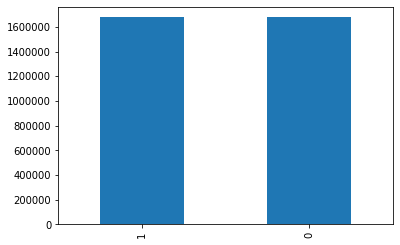

In [90]:
over_sample_wen_on_BO_counts.plot(kind='bar')

In [86]:
### NOw that our data is balanced , we can split the data to X , y, Train and test

In [87]:
X_over = over_sample_df.drop(["sku" , "went_on_backorder"] , 1)
y_over = over_sample_df["went_on_backorder"]

In [88]:
x_over_train, x_over_test, y_over_train, y_over_test = train_test_split(X_over, y_over, test_size=0.30, random_state=100)

### Random Forest 

In [91]:
from sklearn.metrics import accuracy_score, f1_score,confusion_matrix,classification_report,roc_auc_score,roc_curve,auc
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

In [92]:
# Let's run the model

rf = RandomForestClassifier()
rf.fit(x_over_train, y_over_train)

RandomForestClassifier()

#### Random Forest Prediction

In [93]:
# Predicted probabilities
y_pred = rf.predict_proba(x_over_test)

In [94]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)

In [95]:
# Converting to column dataframe (keeping the outcome of 1)
y_pred_1 = y_pred_df.iloc[:,[1]]

In [96]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_over_test)

In [97]:
# Putting sku to index
y_test_df['sku'] = y_test_df.index

In [98]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [99]:
# Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)

In [100]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'went_backorder_Prob'})

In [101]:
cols = y_pred_final.columns.tolist()
cols

['went_on_backorder', 'sku', 'went_backorder_Prob']

In [102]:
cols.insert(1, cols.pop(cols.index('went_on_backorder')))  ## 0 is the destination index , Mid is ur feature
cols

['sku', 'went_on_backorder', 'went_backorder_Prob']

In [103]:
y_pred_final = y_pred_final.reindex(columns= cols)
y_pred_final.head()
## Column reindex is performed 

,sku,went_on_backorder,went_backorder_Prob
0,330027,0,0.00
1,1678400,0,0.01
2,1278243,1,1.00
3,1627106,0,0.00
4,732943,0,0.00


In [104]:
# Creating new column 'predicted' with 1 if went_on_backorder >0.5 else 0
y_pred_final['predicted'] = y_pred_final.went_backorder_Prob.map( lambda x: 1 if x > 0.5 else 0)

In [105]:
y_pred_final

,sku,went_on_backorder,went_backorder_Prob,predicted
0,330027,0,0.00,0
1,1678400,0,0.01,0
2,1278243,1,1.00,1
3,1627106,0,0.00,0
4,732943,0,0.00,0
...,...,...,...,...
1005936,1453917,0,0.00,0
1005937,384689,0,0.00,0
1005938,1685390,1,1.00,1
1005939,212176,1,1.00,1


In [106]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.went_on_backorder, y_pred_final.predicted )
confusion

array([[500535,   2170],
       [  2069, 501167]], dtype=int64)

In [107]:
Classification = metrics.classification_report(y_pred_final.went_on_backorder, y_pred_final.predicted)
print(Classification)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    502705
           1       1.00      1.00      1.00    503236

    accuracy                           1.00   1005941
   macro avg       1.00      1.00      1.00   1005941
weighted avg       1.00      1.00      1.00   1005941



In [111]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    #plt.xlabel('False Positive Rate')
    #plt.ylabel('True Positive Rate')
    #plt.title('Receiver operating characteristic example')
    #plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

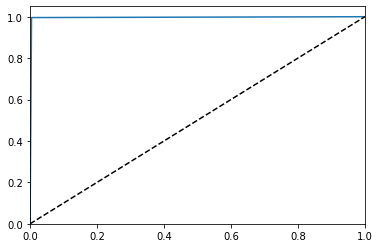

(array([0.        , 0.00431665, 1.        ]),
 array([0.        , 0.99588861, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [112]:
draw_roc(y_pred_final.went_on_backorder, y_pred_final.predicted)

In [113]:
print("The AUC score is :" , roc_auc(y_pred_final.went_on_backorder, y_pred_final.predicted) * 100)
print("The Recall score is : " , metrics.recall_score(y_pred_final.went_on_backorder, y_pred_final.predicted) * 100)
print("The Precision score is : " , metrics.precision_score(y_pred_final.went_on_backorder, y_pred_final.predicted) * 100)
print("The f1 score is : " , metrics.f1_score(y_pred_final.went_on_backorder, y_pred_final.predicted) * 100)

The AUC score is : 99.5785980991498
The Recall score is :  99.588860892305
The Precision score is :  99.56887731281428
The f1 score is :  99.57886809997883


In [114]:
## The Oversampling method is highly overfitting

In [115]:
print(confusion)

[[500535   2170]
 [  2069 501167]]


FP = 2170

FN = 2069 

TN = 500535 

TP = 501167

### Lets see if we can optimise the threshold 

In [116]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.went_backorder_Prob.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

,sku,went_on_backorder,went_backorder_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,330027,0,0.00,0,0,0,0,0,0,0,0,0,0,0
1,1678400,0,0.01,0,1,0,0,0,0,0,0,0,0,0
2,1278243,1,1.00,1,1,1,1,1,1,1,1,1,1,1
3,1627106,0,0.00,0,0,0,0,0,0,0,0,0,0,0
4,732943,0,0.00,0,0,0,0,0,0,0,0,0,0,0


In [117]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final.went_on_backorder, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.932026  0.863980  1.000000
0.1   0.1  0.985848  0.971681  1.000000
0.2   0.2  0.992005  0.984516  0.999485
0.3   0.3  0.993700  0.987909  0.999485
0.4   0.4  0.995325  0.994044  0.996604
0.5   0.5  0.995786  0.995683  0.995889
0.6   0.6  0.995950  0.996435  0.995465
0.7   0.7  0.995903  0.996873  0.994935
0.8   0.8  0.995069  0.997874  0.992268
0.9   0.9  0.993513  0.998604  0.988427


<Figure size 1080x864 with 0 Axes>

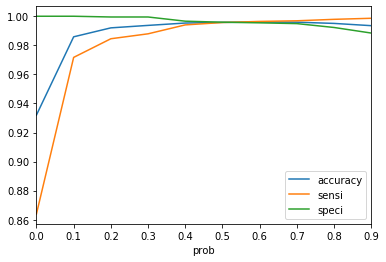

In [119]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

#### As you can see from the plot, the graph converges as 0.5

#### Making 0.5 as the optimum threshold.

#### Hence, there is no requirement in changing the threshold

     ----It is clear that oversampling the data, is indeed making it overfitting . The data is multiplicated----

## 3. SMOTE - Synthetic Minority Over Sampling Technique

The right way to work on imbalanced data and SMOTE is to oversample only on the training data, and leave the test data unseen
 
     * Split the training data further into train and validation data
    
              -- original test data = x_test, y_test
    
              -- original train_data = x_train, y_train
    
     * I will further split x_train, y_train to x_val, y_val, x_train_new, y_train_new
    
     * I will build the models on x_val and y_val, and check the model for performance on x_train_new, y_train_new
    
     * Finally I will check the performace of the model on the unseen x_test, y_test

In [120]:
import imblearn
from imblearn.over_sampling import SMOTE

In [121]:
x_val, x_train_new, y_val,y_train_new = train_test_split(x_train, y_train, test_size = 0.30, random_state=12)

In [122]:
sm = SMOTE()

In [123]:
x_train_res, y_train_res = sm.fit_sample(x_val, y_val)

----- Here SMOTE.fit_sample gives me the resampled data i.e the oversampled data -----

In [124]:
#x_train_res, y_train_res = sm.fit_sample(x_val, y_val)
Counter(y_train_res)

Counter({0: 821446, 1: 821446})

### Random Forest 

In [125]:
from sklearn.metrics import accuracy_score, f1_score,confusion_matrix,classification_report,roc_auc_score,roc_curve,auc
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

In [126]:
# Let's run the model

rf = RandomForestClassifier()
rf.fit(x_train_res, y_train_res)

RandomForestClassifier()

#### Random Forest prediction

In [127]:
# Predicted probabilities
y_pred = rf.predict_proba(x_test)

In [128]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)

In [129]:
# Converting to column dataframe (keeping the outcome of 1)
y_pred_1 = y_pred_df.iloc[:,[1]]

In [130]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [131]:
# Putting sku to index
y_test_df['sku'] = y_test_df.index

In [132]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [133]:
# Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)

In [134]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'went_backorder_Prob'})

In [135]:
cols = y_pred_final.columns.tolist()
cols

['went_on_backorder', 'sku', 'went_backorder_Prob']

In [136]:
cols.insert(1, cols.pop(cols.index('went_on_backorder')))  ## 0 is the destination index , Mid is ur feature
cols

['sku', 'went_on_backorder', 'went_backorder_Prob']

In [137]:
y_pred_final = y_pred_final.reindex(columns= cols)
y_pred_final.head()
## Column reindex is performed

,sku,went_on_backorder,went_backorder_Prob
0,696721,0,0.004065
1,1580507,0,0.119413
2,733985,0,0.217524
3,1029932,0,0.003362
4,1685688,0,0.190000


In [138]:
# Creating new column 'predicted' with 1 if went_on_backorder >0.5 else 0
y_pred_final['predicted'] = y_pred_final.went_backorder_Prob.map( lambda x: 1 if x > 0.5 else 0)

In [139]:
y_pred_final.head()

,sku,went_on_backorder,went_backorder_Prob,predicted
0,696721,0,0.004065,0
1,1580507,0,0.119413,0
2,733985,0,0.217524,0
3,1029932,0,0.003362,0
4,1685688,0,0.190000,0


### Random Forest Metrics 

In [140]:
from sklearn import metrics 

In [141]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.went_on_backorder, y_pred_final.predicted )
confusion

array([[489437,  13556],
       [  1562,   1803]], dtype=int64)

In [142]:
Classification = metrics.classification_report(y_pred_final.went_on_backorder, y_pred_final.predicted)
print(Classification)

              precision    recall  f1-score   support

           0       1.00      0.97      0.98    502993
           1       0.12      0.54      0.19      3365

    accuracy                           0.97    506358
   macro avg       0.56      0.75      0.59    506358
weighted avg       0.99      0.97      0.98    506358



### ROC plot

In [149]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    #plt.xlabel('FPR')
    #plt.ylabel('TPR')
    #plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

In [150]:
def roc_auc(actual , probs):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    return auc_score

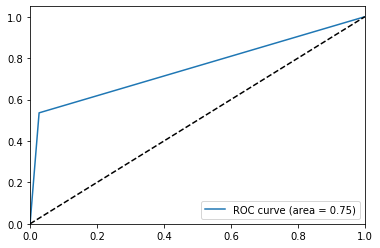

(array([0.        , 0.02695067, 1.        ]),
 array([0.        , 0.53580981, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [151]:
draw_roc(y_pred_final.went_on_backorder, y_pred_final.predicted)

In [152]:
roc_auc(y_pred_final.went_on_backorder, y_pred_final.predicted)

0.75442956678263

In [153]:
print("The AUC score is :" , roc_auc(y_pred_final.went_on_backorder, y_pred_final.predicted) * 100)
print("The Recall score is : " , metrics.recall_score(y_pred_final.went_on_backorder, y_pred_final.predicted) * 100)
print("The Precision score is : " , metrics.precision_score(y_pred_final.went_on_backorder, y_pred_final.predicted) * 100)
print("The f1 score is : " , metrics.f1_score(y_pred_final.went_on_backorder, y_pred_final.predicted) * 100)

The AUC score is : 75.442956678263
The Recall score is :  53.58098068350669
The Precision score is :  11.73904551077544
The f1 score is :  19.258705404828028


### Lets see if we can optimise the threshold 

In [154]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.went_backorder_Prob.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

,sku,went_on_backorder,went_backorder_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,696721,0,0.004065,0,1,0,0,0,0,0,0,0,0,0
1,1580507,0,0.119413,0,1,1,0,0,0,0,0,0,0,0
2,733985,0,0.217524,0,1,1,1,0,0,0,0,0,0,0
3,1029932,0,0.003362,0,1,0,0,0,0,0,0,0,0,0
4,1685688,0,0.190000,0,1,1,0,0,0,0,0,0,0,0


In [155]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final.went_on_backorder, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.205094  0.199790  0.997920
0.1   0.1  0.779660  0.778832  0.903418
0.2   0.2  0.879295  0.879784  0.806241
0.3   0.3  0.927672  0.929079  0.717385
0.4   0.4  0.953408  0.955606  0.624963
0.5   0.5  0.970144  0.973049  0.535810
0.6   0.6  0.986377  0.990071  0.434175
0.7   0.7  0.989559  0.993887  0.342645
0.8   0.8  0.992565  0.997555  0.246657
0.9   0.9  0.993313  0.999018  0.140565


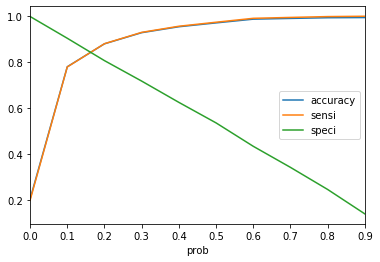

In [156]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

### From the above plot, the graph is converging at 0.18

In [157]:
y_pred_final['final_predicted'] = y_pred_final.went_backorder_Prob.map( lambda x: 1 if x > 0.18 else 0)

In [158]:
y_pred_final.head()

,sku,went_on_backorder,went_backorder_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,696721,0,0.004065,0,1,0,0,0,0,0,0,0,0,0,0
1,1580507,0,0.119413,0,1,1,0,0,0,0,0,0,0,0,0
2,733985,0,0.217524,0,1,1,1,0,0,0,0,0,0,0,1
3,1029932,0,0.003362,0,1,0,0,0,0,0,0,0,0,0,0
4,1685688,0,0.190000,0,1,1,0,0,0,0,0,0,0,0,1


In [159]:
Confusion_after_opt_thres = metrics.confusion_matrix(y_pred_final.went_on_backorder, y_pred_final.final_predicted)
print(Confusion_after_opt_thres)
## the FP has increased tremendously, but the FN have decreases subsequently.

[[437120  65873]
 [   601   2764]]


In [160]:
Classification_after_opt_thres = metrics.classification_report(y_pred_final.went_on_backorder, y_pred_final.final_predicted)
print(Classification_after_opt_thres)

              precision    recall  f1-score   support

           0       1.00      0.87      0.93    502993
           1       0.04      0.82      0.08      3365

    accuracy                           0.87    506358
   macro avg       0.52      0.85      0.50    506358
weighted avg       0.99      0.87      0.92    506358



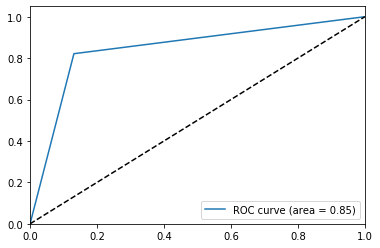

(array([0.        , 0.13096206, 1.        ]),
 array([0.        , 0.82139673, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [161]:
draw_roc(y_pred_final.went_on_backorder, y_pred_final.final_predicted)

In [162]:
print("The AUC score is :" , roc_auc(y_pred_final.went_on_backorder, y_pred_final.final_predicted) * 100)
print("The Recall score is : " , metrics.recall_score(y_pred_final.went_on_backorder, y_pred_final.final_predicted) * 100)
print("The Precision score is : " , metrics.precision_score(y_pred_final.went_on_backorder, y_pred_final.final_predicted) * 100)
print("The f1 score is : " , metrics.f1_score(y_pred_final.went_on_backorder, y_pred_final.final_predicted) * 100)

The AUC score is : 84.52173349763679
The Recall score is :  82.13967310549776
The Precision score is :  4.026982531287789
The f1 score is :  7.677564512096885


In [167]:
print(Confusion_after_opt_thres)

[[437120  65873]
 [   601   2764]]


TN = 437120 

TP = 2764

FP = 65873

FN = 601

--------------------------------------- Comparison----------------------------------------------

----------- Before Optimising the threshold ---------------

In [163]:
print("The AUC score is :" , roc_auc(y_pred_final.went_on_backorder, y_pred_final.predicted) * 100)
print("The Recall score is : " , metrics.recall_score(y_pred_final.went_on_backorder, y_pred_final.predicted) * 100)
print("The Precision score is : " , metrics.precision_score(y_pred_final.went_on_backorder, y_pred_final.predicted) * 100)
print("The f1 score is : " , metrics.f1_score(y_pred_final.went_on_backorder, y_pred_final.predicted) * 100)

The AUC score is : 75.442956678263
The Recall score is :  53.58098068350669
The Precision score is :  11.73904551077544
The f1 score is :  19.258705404828028


In [168]:
print(confusion)

[[489437  13556]
 [  1562   1803]]


TN = 489437 

TP = 1803 

FP = 13556

FN = 1562

---------- After Optimising the threshold------------

In [169]:
print("The AUC score is :" , roc_auc(y_pred_final.went_on_backorder, y_pred_final.final_predicted) * 100)
print("The Recall score is : " , metrics.recall_score(y_pred_final.went_on_backorder, y_pred_final.final_predicted) * 100)
print("The Precision score is : " , metrics.precision_score(y_pred_final.went_on_backorder, y_pred_final.final_predicted) * 100)
print("The f1 score is : " , metrics.f1_score(y_pred_final.went_on_backorder, y_pred_final.final_predicted) * 100)

The AUC score is : 84.52173349763679
The Recall score is :  82.13967310549776
The Precision score is :  4.026982531287789
The f1 score is :  7.677564512096885


In [165]:
print(Confusion_after_opt_thres)

[[437120  65873]
 [   601   2764]]


TN = 437120 

TP = 2764

FP = 65873

FN = 601

## Insights 

    * We have to check the recall performance metric, as it could reduce our False Negative(Type II error) 
    * Since we are getting 82% of recall, It is a good model as we select less False Negative with high cost 